# CA3

### Imports

In [20]:
# import libraries for plotting and data manipulation
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np

# import classfier
from sklearn.neighbors import KNeighborsClassifier

# import model selection and preprocessing tools 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



### Reading data

In [3]:
# load the training and test data 
training_data = pd.read_csv('data/train.csv')
testing_data = pd.read_csv('data/test.csv')

### Data exploration and visualisation

#### Overview of the training and testing data 

In [4]:
# look at the training data  
training_data.head() 

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.825734 -0.883754  -2.423530 -1.198136    -4.286523  1.585792 -0.589002   
1 -0.142286 -0.708374  -2.224219  2.222650     1.896814 -4.284821  1.069387   
2 -1.957254 -4.293733  -1.073703 -1.405019    -0.729812  3.930497 -0.397840   
3 -2.168043  3.095472   1.707717 -0.584218    -0.564767  0.014740 -0.103799   
4 -3.149338  3.058402   2.173671 -0.265609    -2.563220  0.376015  1.434252   

   Peel Thickness  Banana Density  Quality  
0        0.164434    65822.758426        0  
1        0.704945    99930.329162        0  
2        0.852810    37081.567982        0  
3        0.582909    63931.435551        1  
4        0.102162    48711.448819        1

In [5]:
# look at the testing data 
testing_data.head()

Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -3.875250  1.925768  -0.007290 -1.907522    -2.323240  2.007514  1.689306   
1 -1.044948  2.202611   1.532594 -0.518360     0.543042  2.234996  2.194826   
2 -1.561883 -0.382041   0.196888 -2.794003    -0.656810  2.185048  0.395617   
3  2.236284  1.299091  -4.631458  0.210640     3.399148 -3.380890  3.305318   
4  0.083456  2.580620   2.243211  0.138230    -1.381815  1.634982  2.369361   

   Peel Thickness  Banana Density  
0        0.580998    41364.956304  
1        0.721032    46998.670804  
2        0.609076    74452.850087  
3        0.524978      -22.860696  
4        0.522718    34980.804588

### Data cleaning

#### Look for missing values 

In [6]:
# identify and remove missing values 
NaN = training_data.isna().sum()
print(NaN)
print('No missing values were found in the training data') 


Size              0
Weight            0
Sweetness         0
Softness          0
HarvestTime       0
Ripeness          0
Acidity           0
Peel Thickness    0
Banana Density    0
Quality           0
dtype: int64
No missing values were found in the training data


#### Perform descriptive statistics 

In [7]:
# descriptive statistics on the training data 
training_data.describe()

Size       Weight    Sweetness     Softness  HarvestTime  \
count  2800.000000  2800.000000  2800.000000  2800.000000  2800.000000   
mean     -0.764652    -0.751050    -0.751005    -0.019557    -0.700683   
std       2.114313     2.006590     1.955109     2.076865     2.029916   
min      -7.998074    -7.103426    -6.434022    -6.959320    -7.570008   
25%      -2.249285    -2.238843    -2.104742    -1.593816    -2.112747   
50%      -0.922448    -0.882387    -0.997902     0.220174    -0.856858   
75%       0.638570     0.853566     0.334989     1.542899     0.628895   
max       5.806328     5.679692     6.438196     8.241555     5.942060   

          Ripeness      Acidity  Peel Thickness  Banana Density      Quality  
count  2800.000000  2800.000000     2800.000000     2800.000000  2800.000000  
mean      0.771011    -0.000989        0.506758    49397.491271     0.506429  
std       2.098275     2.286725        0.291936    29327.077623     0.500048  
min      -7.423155    -8.226977        0.000086     -980.343999     0.000000  
25%      -0.572589    -1.608385        0.257860    24025.427350     0.000000  
50%       0.930927     0.073963        0.506282    49303.534616     1.000000  
75%       2.229410     1.662417        0.761016    75066.598785     1.000000  
max       7.077372     6.395850        0.999430    99982.761410     1.000000

#### Visualize feature distributions 

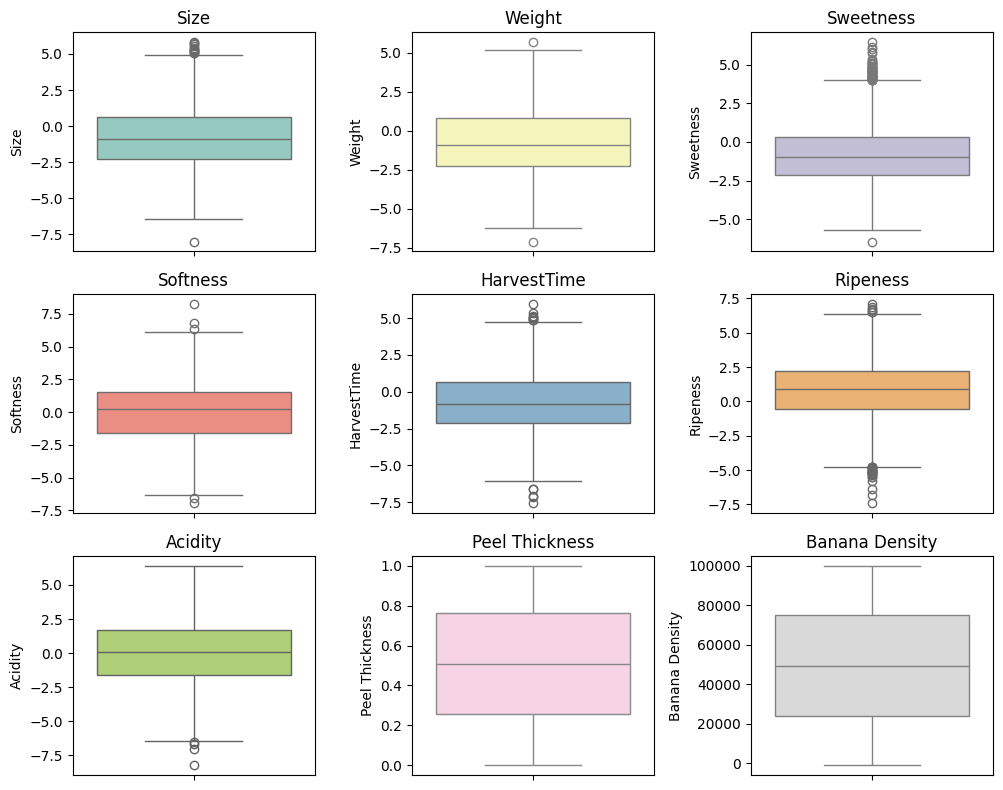

In [8]:
# visualize the feature distributions 
fig, axes = plt.subplots(3,3, figsize = (10,8)) 
axes = axes.flatten() 

columns = training_data.columns[:9] 
colors = sns.color_palette('Set3', n_colors=len(columns)) 

for i, col in enumerate(columns): 
    sns.boxplot(training_data[col], ax = axes[i], color = colors[i])
    axes[i].set_title(col) 

plt.tight_layout()
plt.show()


#### Visualize the feature relationships using pairplots from seaborn 

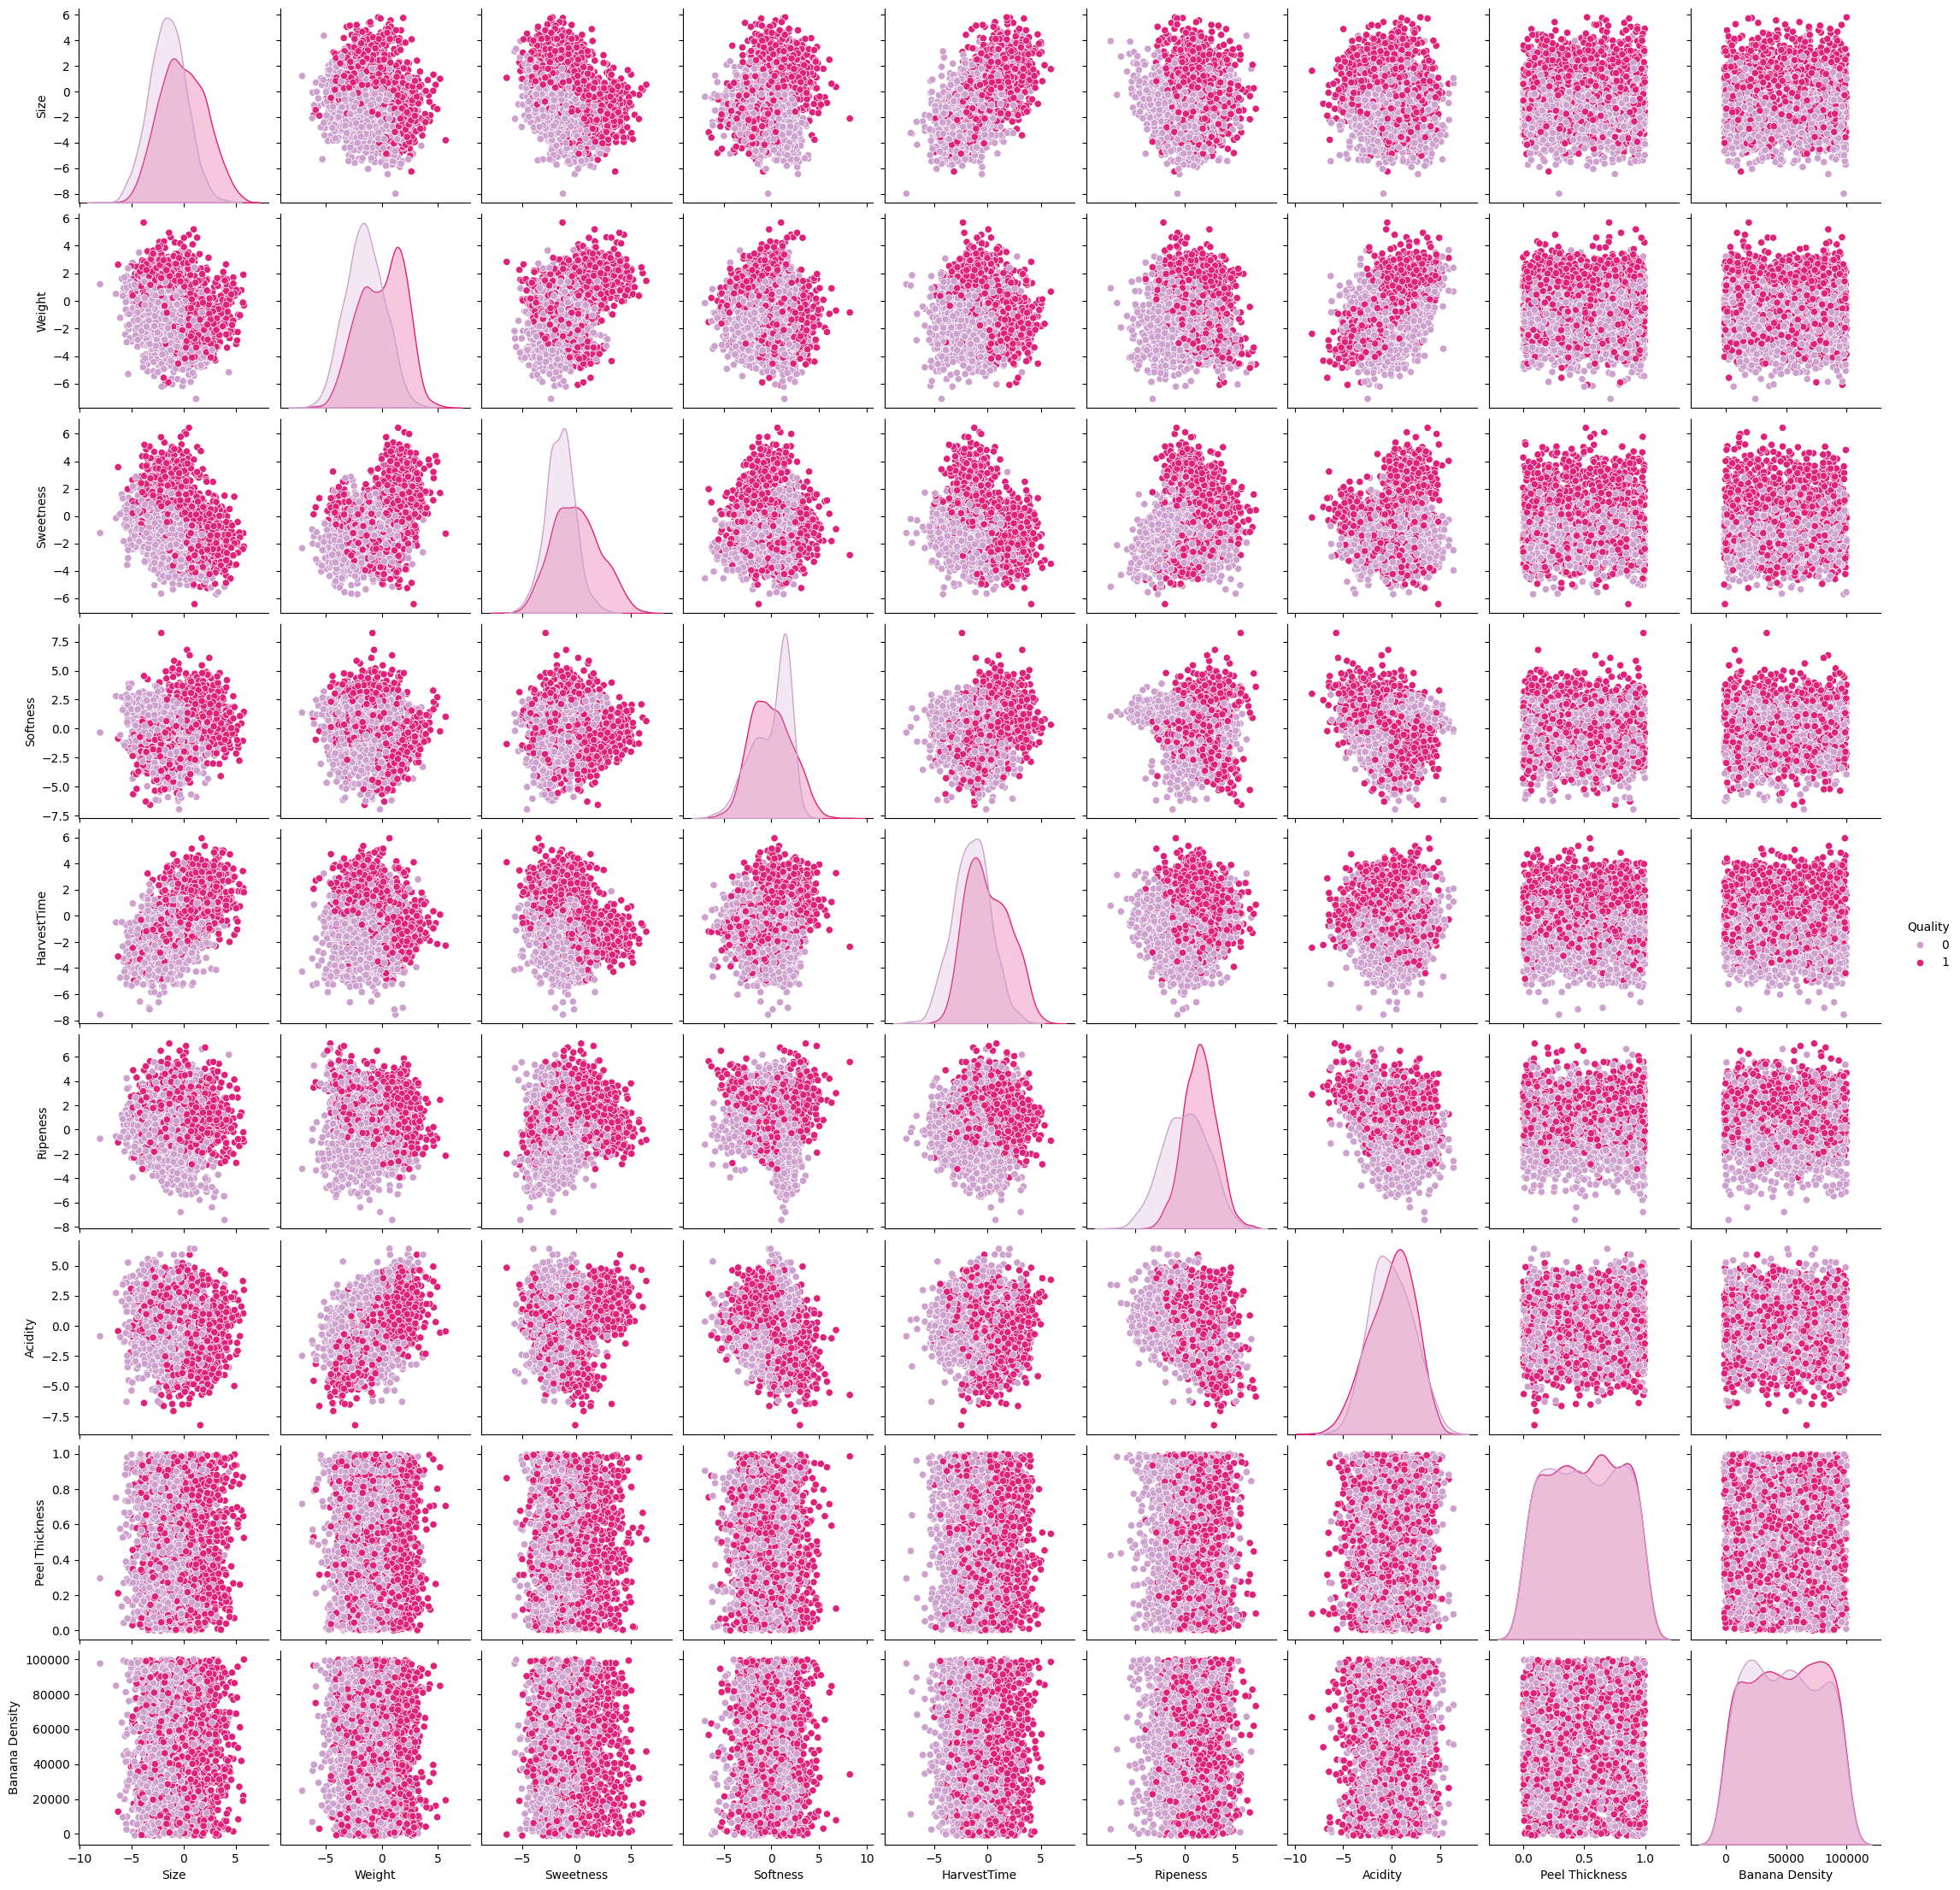

In [9]:
# visualize the data using seaborn pairplots 

sns.pairplot(training_data, hue = 'Quality', palette= 'PuRd')
plt.show()

### Data preprocessing and visualisation

#### Split the data into X_train and y_train 

In [11]:
# split the data into X_train and y_train 

X_train = training_data.drop('Quality', axis = 1)
y_training = training_data['Quality']

print('After splitting the data, the shape of the training data is:')
print(X_train.shape, y_training.shape)

print('We can see that the distribution of the target variable in the training data is balanced:') 
print(f"Labels counts in y_train: {np.bincount(y_training)}")

# rename testing data 
X_test = testing_data


After splitting the data, the shape of the training data is:
(2800, 9) (2800,)
We can see that the distribution of the target variable in the training data is balanced:
Labels counts in y_train: [1382 1418]


#### Identify and remove outliers from X_train using Z-score 

In [12]:
# Detect outliers using z-scores 

# Compute Z-scores
z_scores = (X_train - X_train.mean()) / X_train.std()

# Identify Outliers (absolute Z-score > 3)
outliers = (np.abs(z_scores) > 3)

# Count total outliers
num_outliers = outliers.sum().sum()  # Summing over all columns

print(f"Total number of outliers: {num_outliers}")


Total number of outliers: 32


In [13]:
# Remove outliers with a z-score > 3 

X_train_clean = X_train[(z_scores < 3).all(axis=1)]
y_train_clean = y_training[X_train_clean.index]

# Check the shape of the cleaned data 
print(X_train.shape, y_training.shape)
print(X_train_clean.shape, y_train_clean.shape)


(2800, 9) (2800,)
(2783, 9) (2783,)


#### Visualize the cleaned data 

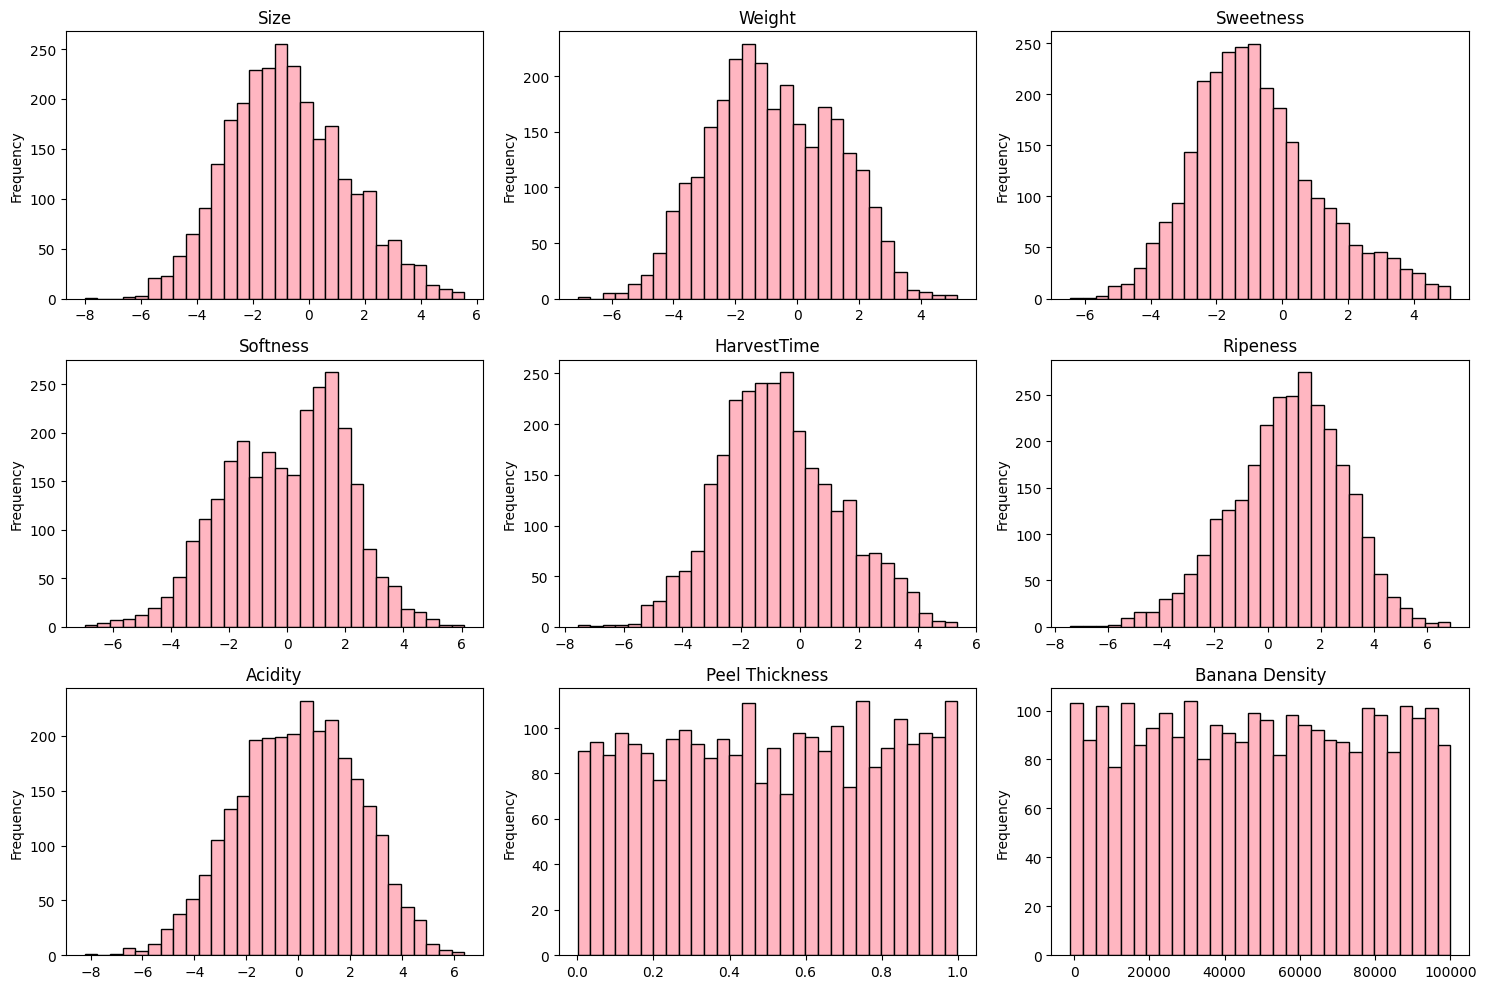

In [14]:

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  

# Selected features
features = ["Size", "Weight", "Sweetness", "Softness", "HarvestTime", "Ripeness", "Acidity", "Peel Thickness", "Banana Density"]

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each histogram
for i, feature in enumerate(features):
    axes[i].hist(X_train_clean[feature], bins=30, color='lightpink', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

#### Correlation heatmap of the cleaned training data 

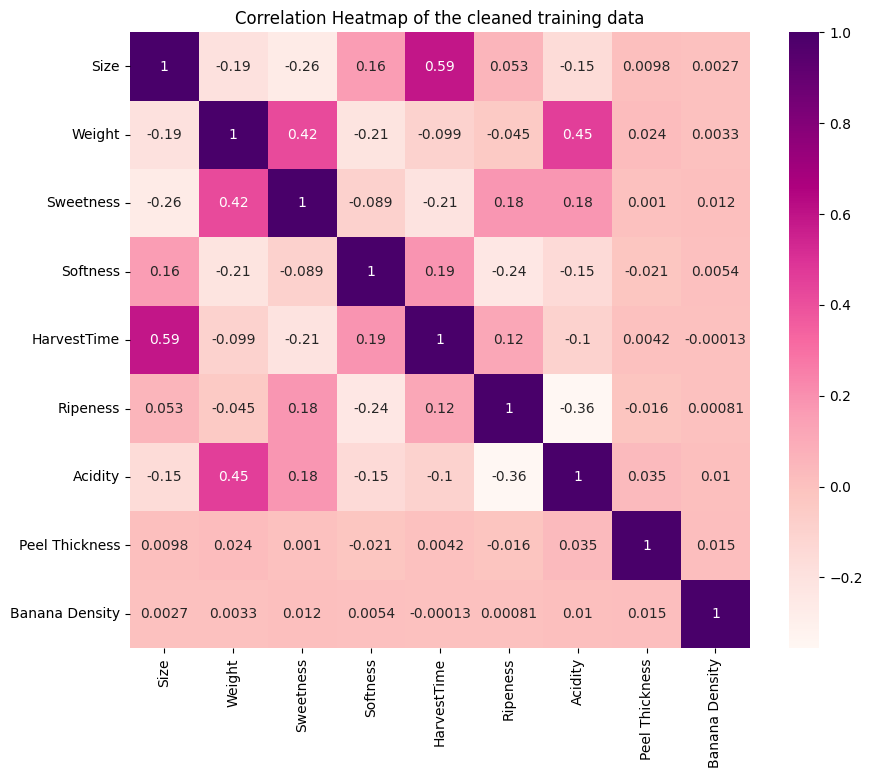

In [15]:
# correlation heat map 
plt.figure(figsize = (10,8))
sns.heatmap(X_train_clean.corr(), annot = True, cmap = 'RdPu')
plt.title('Correlation Heatmap of the cleaned training data')
plt.show()

#### Scale X_train and X_test using StandardScaler() from SciKitLearn 

In [16]:
# Scale features using StandardScaler class in scikit-learn

# initialize the StandardScaler class
sc = StandardScaler() 
sc.fit(X_train_clean)

# scale training and test data
X_train_sc = sc.transform(X_train_clean)
X_test_sc = sc.transform(X_test)

# Print mean and standard deviation of standardized data 
print('Mean of standardized training data: ', X_train_sc.mean(axis=0)) 
print('Standard deviation of standardized training data: ', X_train_sc.std(axis=0)) 

Mean of standardized training data:  [ 7.14883097e-17  5.23396553e-17  6.38288480e-18 -5.74459632e-18
 -4.46801936e-18 -2.17018083e-17 -1.43614908e-17  1.55742389e-16
  4.00845165e-16]
Standard deviation of standardized training data:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Visualize the data before and after scaling 

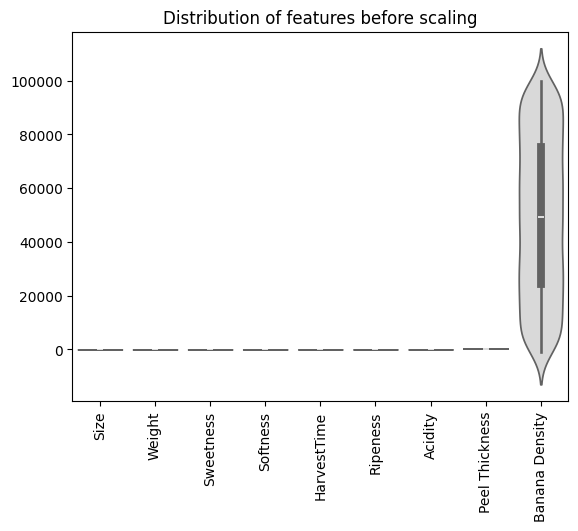

In [17]:
# see if the data was properly scaled 
# before scaling 
sns.violinplot(X_train_clean, palette = sns.color_palette('Set3', n_colors= X_train_clean.shape[1])) 
plt.xticks(rotation = 90)
plt.title('Distribution of features before scaling')
plt.show()

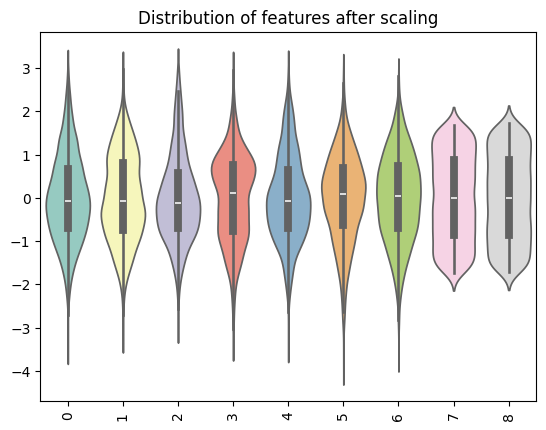

In [18]:
# after scaling 
sns.violinplot(X_train_sc, palette = sns.color_palette('Set3',n_colors = X_train_sc.shape[1])) 
plt.xticks(rotation = 90)
plt.title('Distribution of features after scaling')
plt.show()

We can see that the features looks much more evenly distributed after standardization (scaling). 
In the unscaled data, the banana density is much larger than the other features. 

### Modelling

In [21]:

best_k = 0
best_accuracy = 0

for k in range(1, 10):
    # Use 100 random train-validation set splits to optimize the hyperparameter k
    # Store the accuracies for each random split
    accuracies = []
    for r in range(100):
        # Train-Validation set split
        random_state = r
        X_train, X_val, y_train, y_val = train_test_split(X_train_sc, y_train_clean, test_size=0.4, random_state=random_state)
        # Train k-nearest neighbors classifier with k neighbors
        knn = KNeighborsClassifier(n_neighbors=k)
        y_pred = knn.fit(X_train, y_train).predict(X_val)
        accuracy = accuracy_score(y_pred, y_val)
        accuracies.append(accuracy)

    # Take the mean over all random splits
    accuracy = np.mean(accuracies)

    # Update the best k and best accuracy if the current k was better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k: {best_k}, Best accuracy during optimization: {best_accuracy:.3f}")

Best k: 7, Best accuracy during optimization: 0.967


### Final evaluation

#### Train the best model on the entire data set 

In [22]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_sc, y_train_clean)

KNeighborsClassifier(n_neighbors=7)

### Kaggle submission

In [24]:
y_test = knn.predict(X_test_sc)
y_test = pd.DataFrame(y_test, columns=["Quality"])
y_test.index.name = "ID"
y_test[['Quality']].to_csv("data/sample_submission.csv")